In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from pprint import pprint

### 이상치
- 값이 크게 차이가 나는 데이터를 뜻한다.
- 분석 모델의 성능을 떨어뜨리거나 분석 결과에 악영향
- 해당하는 이상치를 확인 후 대체, 제거
- 일반적으로 수치형 데이터의 이상치의 판단 기준은 IQR 방식
- IQR 방식은 matplotlib에서 제공하는 boxplot의 이상치 경계 기준을 그래도 사용
- IQR 방식은 Q3(3사분위수)와 Q1(1사분위수)의 값에 차이를 이용
- 이상치의 경계는 (Q3 + 1.5 * IQR)보다 크거나 (Q1 - 1.5 * IQR)보다 작은 범위를 이상치로 간주

In [24]:
# scikitlearn에서 제공하는 샘플 데이터 로드
wine_load = load_wine()

In [27]:
wine_load['feature_names']

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

In [32]:
wine = pd.DataFrame(wine_load['data'], columns = wine_load['feature_names'])

#wine = pd.DataFrame(wine_load['data'], columns=wine_load['feature_names'])


{'whiskers': [<matplotlib.lines.Line2D object at 0x1562826f0>, <matplotlib.lines.Line2D object at 0x1562d7fe0>], 'caps': [<matplotlib.lines.Line2D object at 0x1562d66f0>, <matplotlib.lines.Line2D object at 0x1562d7800>], 'boxes': [<matplotlib.lines.Line2D object at 0x156280140>], 'medians': [<matplotlib.lines.Line2D object at 0x1562d7590>], 'fliers': [<matplotlib.lines.Line2D object at 0x1562d7170>], 'means': []}

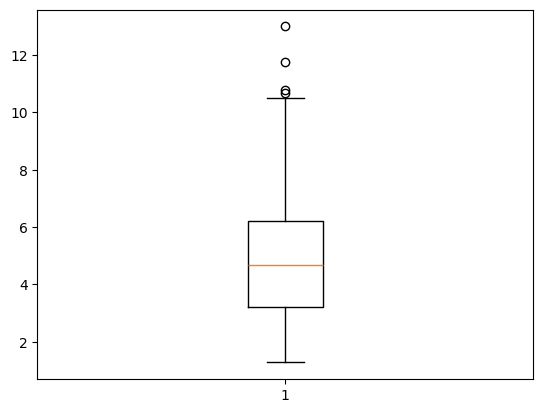

In [33]:
plt.boxplot(wine['color_intensity'])

In [45]:
## 이상치의 값들을 출력하는 함수를 하나 생성
## 매개변수 : 데이터프레임, 특정 컬럼명
def outliers_iqr(_df, _col):
    # _df: 데이터프레임
    # _col : 컬럼명
    # 1사분위수, 3사분위수
    q_1, q_3 = np.percentile(_df[_col], [25,75])
    # iqr 데이터를 생성
    iqr = q_3 - q_1
    # 이상치의 상단의 경계, 하단의 경계 변수에 대입
    upper_whis = q_3 + 1.5 * iqr
    lower_whis = q_1 - 1.5 * iqr
    print(f'상단의 경계값 :{upper_whis}')
    print(f"하단의 경계값: {lower_whis}")
    # 입력받은 데이터프레임에서 상단의 경계보다 크거나
    # 하단에 경계보다 낮은 데이터를 필터링
    flag = (_df[_col] > upper_whis) | (_df[_col] < lower_whis)
    result = _df.loc[flag]
    return result

In [46]:
outlier = outliers_iqr(wine, 'color_intensity')
outlier

상단의 경계값 :10.670000000000002
하단의 경계값: -1.2500000000000009


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0


### 이상치의 정제
1. 이상치 제거
    - 데이터 개수가 매우 많고 이상치가 존재하는 행의 수가 
    전체 데이터에서 많은 비중을 차지하지 않는다면 제거 가능
    - 이상치를 제거 -> 데이터의 개수가 줄어든다.
2. 이상치를 특정한 값을 대체
    - 이상치의 값을 다른 값으로 대체하는 경우는 분석가에 따라
    값들에는 차이가 발생

In [48]:
## 이상치를 제거
drop_outlier = wine.drop(outlier.index, axis = 0)
## 제거가 잘 되었는가 확인
print(f'원본데이터의 크기:{len(wine)},{wine.shape}')
print(f'이상치를 제거한 데이터의 크기 :{len(drop_outlier)}, {drop_outlier.shape}')

원본데이터의 크기:178,(178, 13)
이상치를 제거한 데이터의 크기 :174, (174, 13)


In [65]:
## 이상치를 특정한 값으로 대체
wine.loc[outlier.index,'color_intensity'] = np.NaN

In [66]:
wine.loc[outlier.index]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,NaN,0.48,1.47,480.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,NaN,0.57,1.96,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,NaN,0.57,1.78,620.0
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,NaN,0.85,1.56,695.0


In [67]:
wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 4
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [68]:
# 평균값을 변수에 대입
mean_data = wine['color_intensity'].mean()
mean_data

4.908678155172414

In [70]:
# 평균값을 결측치에 대체
wine['color_intensity'] = wine['color_intensity'].fillna(mean_data)

In [71]:
wine.loc[outlier.index]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,4.908678,0.48,1.47,480.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,4.908678,0.57,1.96,660.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,4.908678,0.57,1.78,620.0
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,4.908678,0.85,1.56,695.0


In [72]:
from sklearn.datasets import load_iris


In [74]:
pprint(load_iris())

{'DESCR': '.. _iris_dataset:\n'
          '\n'
          'Iris plants dataset\n'
          '--------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          ':Number of Instances: 150 (50 in each of three classes)\n'
          ':Number of Attributes: 4 numeric, predictive attributes and the '
          'class\n'
          ':Attribute Information:\n'
          '    - sepal length in cm\n'
          '    - sepal width in cm\n'
          '    - petal length in cm\n'
          '    - petal width in cm\n'
          '    - class:\n'
          '            - Iris-Setosa\n'
          '            - Iris-Versicolour\n'
          '            - Iris-Virginica\n'
          '\n'
          ':Summary Statistics:\n'
          '\n'
          '============== ==== ==== ======= ===== ====================\n'
          '                Min  Max   Mean    SD   Class Correlation\n'
          '============== ==== ==== ======= ===== ====================\n'
          '

In [89]:
# iris 데이터 로드
iris = pd.DataFrame(load_iris()['data'], columns = load_iris()['feature_names'])

{'whiskers': [<matplotlib.lines.Line2D object at 0x16c938680>, <matplotlib.lines.Line2D object at 0x16c93a7b0>], 'caps': [<matplotlib.lines.Line2D object at 0x16c93bb30>, <matplotlib.lines.Line2D object at 0x16c93be60>], 'boxes': [<matplotlib.lines.Line2D object at 0x16c93aab0>], 'medians': [<matplotlib.lines.Line2D object at 0x16c93a0c0>], 'fliers': [<matplotlib.lines.Line2D object at 0x16c815040>], 'means': []}

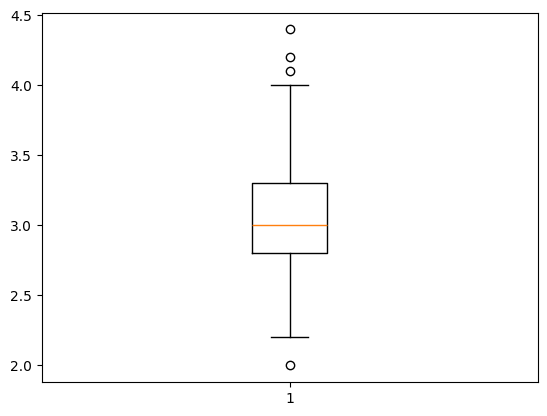

In [90]:
# iris 데이터의 2번째컬럼 시각화
plt.boxplot(iris['sepal width (cm)'])

In [91]:
#iris 'sepal width (cm)'
outlier = outliers_iqr(iris,'sepal width (cm)')

상단의 경계값 :4.05
하단의 경계값: 2.05


In [92]:
outlier

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [94]:
# 중간값 변수에 대입
_2 = np.percentile(iris['sepal width (cm)'], 50)
_2

3.0

In [95]:
# 이상치 데이터를 결측치로 변경
iris.loc[outlier.index, 'sepal width (cm)'] = np.nan

In [101]:

iris['sepal width (cm)'] = iris['sepal width (cm)'].fillna(_2)

In [102]:
iris['sepal width (cm)'].isna().sum()

0

In [103]:
iris.loc[outlier.index]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,3.0,1.5,0.4
32,5.2,3.0,1.5,0.1
33,5.5,3.0,1.4,0.2
60,5.0,3.0,3.5,1.0
